<a href="https://colab.research.google.com/github/ZeusKwon/Data-Science/blob/main/n113_data_manipulation_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[warm-up] 자주사용하는 pandas tricks 정리**

In [39]:
import pandas as pd
import numpy as np

In [40]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [41]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kt%26g/kt%26g_0.csv'
headers = ['분기', '매출액', '영업이익', '영업이익(발표기준)', '세전계속사업이익',
           '당기순이익', '당기순이익(지배)', '당기순이익(비지배)', '자산총계', '부채총계',
           '자본총계', '자본총계(지배)', '자본총계(비지배)', '자본금', '영업활동현금흐름',
           '투자활동현금흐름', '재무활동현금흐름', '영업이익률', '순이익률', 'ROE(%)',
           'ROA(%)', '부채비율', '자본유보율', 'EPS(원)', 'PER(배)']
import pandas as pd

df_test = pd.read_csv(url, names = headers)

df_test

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배)
0,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",NaN,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77
1,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
3,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
4,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46


### 1. show installed versions



In [42]:
# pandas의 버전을 확인
pd.__version__

'1.1.5'

In [43]:
# 모든 설치 버전을 확인
pd.show_versions()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.112+
Version          : #1 SMP Thu Jul 23 08:00:38 PDT 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 56.1.0
Cython           : 0.29.22
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 

### 2. Create an example DataFrame

In [ ]:
# 데이터프레임 생성
df = pd.DataFrame({'col one':[100,200], 'col two':[300,400]})
df

,col one,col two
0,100,300
1,200,400


In [ ]:
# 4X8인 데이터 프레임을 랜덤인 수로 생성
pd.DataFrame(np.random.rand(4,8))

,0,1,2,3,4,5,6,7
0,0.587444,0.434059,0.252389,0.379274,0.631448,0.184214,0.051949,0.459646
1,0.379674,0.296575,0.092817,0.385455,0.134666,0.620685,0.647754,0.303707
2,0.414809,0.754432,0.020765,0.888829,0.995600,0.945617,0.730726,0.764283
3,0.012780,0.168933,0.140260,0.742172,0.450126,0.105764,0.031287,0.751827


In [ ]:
# 열이름은 a부터 h까지로 지정 열 갯수와 같아야 함
pd.DataFrame(np.random.rand(4,8),columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.164599,0.111263,0.011151,0.523242,0.059502,0.743126,0.965739,0.990292
1,0.074815,0.403781,0.421859,0.512364,0.732072,0.266494,0.769492,0.542338
2,0.054073,0.329008,0.625092,0.262043,0.582552,0.250234,0.410511,0.265775
3,0.642768,0.997330,0.944906,0.566281,0.744106,0.300850,0.546308,0.700607


### 2. Rename columns(칼럼 이름 바꾸기)

In [44]:
df

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


In [ ]:
# 1번째 방법
df1 = df
df1 = df1.rename({'col one':'col_one', 'col two':'col_two'},axis = 'columns')
df1

,col_one,col_two
0,100,300
1,200,400


In [ ]:
# 2번째 방법
df2 = df
df2.columns = ['col_one', 'col_two']
df2

,col_one,col_two
0,100,300
1,200,400


In [ ]:
# 3번째 방법
df3 = df
df3.columns = df.columns.str.replace(' ', '_')
df3

,col_one,col_two
0,100,300
1,200,400


In [ ]:
# 칼럼 앞에 특정 단어 추가
df.add_prefix('X_')

,X_col_one,X_col_two
0,100,300
1,200,400


In [ ]:
# 칼럼 뒤에 특정 단어 추가
df.add_suffix('_Y')

,col_one_Y,col_two_Y
0,100,300
1,200,400


### 4. Reverse row order(row 뒤집기)

In [ ]:
df_test

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배)
0,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",NaN,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77
1,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
3,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
4,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46


In [ ]:
# 1번째 방법
df_test.loc[::-1]

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배)
4,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46
3,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
1,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
0,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",NaN,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77


In [ ]:
# 2번째 방법
df_test.loc[::-1].reset_index(drop=True)

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배)
0,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46
1,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
3,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
4,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",NaN,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77


### 5. Reverse column order(열 순서 바꾸기)

In [ ]:
df_test

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배)
0,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",NaN,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77
1,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
3,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
4,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46


In [ ]:
df_test.loc[:,::-1]

,PER(배),EPS(원),자본유보율,부채비율,ROA(%),ROE(%),순이익률,영업이익률,재무활동현금흐름,투자활동현금흐름,영업활동현금흐름,자본금,자본총계(비지배),자본총계(지배),자본총계,부채총계,자산총계,당기순이익(비지배),당기순이익(지배),당기순이익,세전계속사업이익,영업이익(발표기준),영업이익,매출액,분기
0,13.77,"2,351",803.22,31.43,9.37,12.35,25.80,31.73,"-4,919","-1,878","4,641","9,550",NaN,"81,965","82,524","25,940","108,464",17,"3,228","3,245","4,452","3,991","3,991","12,578",19/6
1,13.87,"2,337",836.86,24.17,9.95,12.67,24.36,28.93,-329,-83,"-2,278","9,550",NaN,"85,049","85,623","20,691","106,314",13,"3,208","3,221","4,503","3,825","3,825","13,222",19/9
2,12.42,873,850.82,23.04,9.96,12.39,9.87,21.06,-129,-501,837,"9,550",NaN,"86,506","87,059","20,062","107,121",-15,"1,198","1,183","1,794","2,523","2,523","11,982",19/12
3,9.71,"2,134",823.16,29.69,9.79,13.05,24.94,26.73,-86,"-1,392","2,336","9,550",562.0,"83,170","83,732","24,862","108,594",9,"2,930","2,939","4,156","3,150","3,150","11,784",20/3
4,10.46,"2,135",837.40,26.91,9.40,12.20,22.25,29.93,"-5,501",-214,"7,855","9,550",566.0,"86,330","86,896","23,386","110,282",4,"2,931","2,935","4,020","3,947","3,947","13,188",20/6


### 6. Select columns by data type(특정 데이터 타입 추출)

In [ ]:
df_test.dtypes

분기             object
매출액            object
영업이익           object
영업이익(발표기준)     object
세전계속사업이익       object
당기순이익          object
당기순이익(지배)      object
당기순이익(비지배)      int64
자산총계           object
부채총계           object
자본총계           object
자본총계(지배)       object
자본총계(비지배)     float64
자본금            object
영업활동현금흐름       object
투자활동현금흐름       object
재무활동현금흐름       object
영업이익률         float64
순이익률          float64
ROE(%)        float64
ROA(%)        float64
부채비율          float64
자본유보율         float64
EPS(원)         object
PER(배)        float64
dtype: object

In [ ]:
# 데이터 타입이 number인 칼럼만 추출
df_test.select_dtypes(include='number') 

,당기순이익(비지배),자본총계(비지배),영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,PER(배)
0,17,NaN,31.73,25.80,12.35,9.37,31.43,803.22,13.77
1,13,NaN,28.93,24.36,12.67,9.95,24.17,836.86,13.87
2,-15,NaN,21.06,9.87,12.39,9.96,23.04,850.82,12.42
3,9,562.0,26.73,24.94,13.05,9.79,29.69,823.16,9.71
4,4,566.0,29.93,22.25,12.20,9.40,26.91,837.40,10.46


In [ ]:
# 데이터 타입 여러개를 지정해서 추출
df_test.select_dtypes(include=['number','object'])

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배)
0,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",NaN,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77
1,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
3,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
4,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46


In [ ]:
# 특정 데이터 타입을 제외한 칼럼을 추출
df_test.select_dtypes(exclude='float')

,분기,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,EPS(원)
0,19/6,"12,578","3,991","3,991","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965","9,550","4,641","-1,878","-4,919","2,351"
1,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049","9,550","-2,278",-83,-329,"2,337"
2,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506","9,550",837,-501,-129,873
3,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170","9,550","2,336","-1,392",-86,"2,134"
4,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330","9,550","7,855",-214,"-5,501","2,135"


### Convert Strings to Numbers(문자열을 숫자열로 변환)

In [ ]:
df = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                   'col_two':['4.4','5.5','6.6'],
                   'col_three':['7.7','8.8','-']})
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,-


In [ ]:
df.dtypes

col_one      object
col_two      object
col_three    object
dtype: object

In [ ]:
df.astype({'col_one':'float','col_two':'float'}).dtypes

col_one      float64
col_two      float64
col_three     object
dtype: object

In [ ]:
# 속성값에 결측값이 있으면 사용
pd.to_numeric(df.col_three, errors='coerce')

0    7.7
1    8.8
2    NaN
Name: col_three, dtype: float64

In [ ]:
# 결측값을 0으로 변환
pd.to_numeric(df.col_three, errors='coerce').fillna(0)

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,0.0


In [ ]:
df.dtypes

col_one      float64
col_two      float64
col_three    float64
dtype: object

### 8. Reduce DataFrame Size(데이터 프레임의 크기 줄이기)

In [ ]:
df_test.info(memory_usage='deep') # 5.3KB를 사용

In [ ]:
# 필요한 열만 추출
cols = ['매출액', '영업이익']
small_df = df_test[cols]
small_df.info(memory_usage='deep') # 753바이트로 축소

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매출액     5 non-null      object
 1   영업이익    5 non-null      object
dtypes: object(2)
memory usage: 753.0 bytes


### 9. 여러 파일에 있는 row 데이터 세트를 읽어오기

In [ ]:
from glob import glob

# data폴더에 있는 stocks으로 시작하는 파일을 찾아서 정렬
stock_files = sorted(golb('data/stocks*.csv'))

# stacks로 시작하는 모든 파일의 데이터를 가져와서 순서를 새로 배치
pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)


### 10. 여러 파일에 있는 columns 데이터 세트 가져오기


In [ ]:
# data폴더에 있는 drinks로 시작하는 파일을 찾고 정렬
drink_files = sorted(glob('data/drinks*.csv'))

# 데이터를 열을 기준으로 가지고 와서 순서대로 배치
pd.concat((pd.read_csv(file) for file in drink_files), axis='columns').head()

### 11.Create a DataFrame from the clipboard(클립보드로 테이블을 복사해서 가져오기)

In [5]:
# 클립보드에 복사되어있는 테이블을 출력
df = pd.read_clipboard()
df

### 12.Split a DataFrame into two random subsets(데이터 분할 저장)

In [ ]:
# movies_1에 데이터의 75%만 무작위로 저장
movies_1 = movies.sample(frac=0.75, random_state=1234)

# movies_2에 movies_1을 뺀 부분만 저장(나머지 저장)
movies_2 = movies.drop(movies_1.index)

### 13. Filter a DataFrame by multiple categories(조건에 맞는 데이터만 출력)

In [ ]:
movies.genre.unique() # movies 데이터의 장르를 중복없이 출력

# Action,Drama, Western의 장르만 출력 
# 방법1
movies[(movies.genre == 'Action') |
       (movies.genre == 'Drama') |
       (movies.genre == 'Western')].head()

#방법2
movies[movies.genre.isin(['Action', 'Drama', 'Western'])].head()

#방법3 : 앞에 '~'표시를 넣으면 python의 'not'과 같은 역할
movies[~movies.genre.isin(['Action', 'Drama', 'Western'])].head()

In [8]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### 14. Filter a DataFrame by largest categories(가장 큰 3개의 장르만 출력)

In [9]:
counts = movies.genre.value_counts()
counts 

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [11]:
counts.nlargest(3).index # 상위 3개

Index(['Drama', 'Comedy', 'Action'], dtype='object')

In [12]:
# 상위 3개인것만 출력
movies[movies.genre.isin(counts.nlargest(3).index)].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


### 15. Handle missing values(결측값 비율 찾아서 열 삭제)


In [13]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [14]:
# 각 column별 결측값 갯수
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [15]:
# 결측값 비율
ufo.isna().mean()

City               0.001371
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

In [16]:
# 모든 결측값 열 삭제
ufo.dropna(axis='columns').head()

,State,Time
0,NY,1930-06-01 22:00:00
1,NJ,1930-06-30 20:00:00
2,CO,1931-02-15 14:00:00
3,KS,1931-06-01 13:00:00
4,NY,1933-04-18 19:00:00


In [17]:
# 결측값이 90%이상인 열만 삭제
ufo.dropna(thresh=len(ufo)*0.9, axis='columns').head()

,City,State,Time
0,Ithaca,NY,1930-06-01 22:00:00
1,Willingboro,NJ,1930-06-30 20:00:00
2,Holyoke,CO,1931-02-15 14:00:00
3,Abilene,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NY,1933-04-18 19:00:00


### 16.Split a string into multiple columns(문자열 분할)

In [18]:
df = pd.DataFrame({'name':['John Arthur Doe', 'Jane Ann Smith'],
                   'location':['Los Angeles, CA', 'Washington, DC']})
df

,name,location
0,John Arthur Doe,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"


In [19]:
df.name.str.split(' ', expand=True)

,0,1,2
0,John,Arthur,Doe
1,Jane,Ann,Smith


In [20]:
df[['first', 'middle', 'last']] = df.name.str.split(' ', expand=True)
df

,name,location,first,middle,last
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith


In [21]:
df.location.str.split(', ', expand=True)

,0,1
0,Los Angeles,CA
1,Washington,DC


In [22]:
# name, location을 바탕으로 새로운 열 추가
df['city'] = df.location.str.split(', ', expand=True)[0]
df

,name,location,first,middle,last,city
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe,Los Angeles
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith,Washington


### 17. Expand a Series of lists into a DataFrame(데이터 프레임에서 데이터 프레임 만들기) 

In [23]:
df = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


In [24]:
df_new = df.col_two.apply(pd.Series)
df_new

,0,1
0,10,40
1,20,50
2,30,60


### 18. Aggregate by multiple functions

In [25]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [26]:
# 주문번호가 1인 사람들의 item_price의 합
orders[orders.order_id == 1].item_price.sum()

11.56

In [27]:
# 주문번호별 합
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

In [28]:
# 합과 갯수를 같이 구할때 agg매서드 활용
orders.groupby('order_id').item_price.agg(['sum', 'count']).head()

,sum,count
order_id,,
1,11.56,4
2,16.98,1
3,12.67,2
4,21.00,2
5,13.70,2


### 19. Combine the output of an aggregation with a DataFrame(group별 데이터 프레임에 추가)

In [29]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [30]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

In [34]:
len(orders.groupby('order_id').item_price.sum())

1834

In [33]:
len(orders.item_price) # group을 지어버리면 데이터의 길이가 달라짐 그래서

4622

In [36]:
# total_price에 저장
total_price = orders.groupby('order_id').item_price.transform('sum')
len(total_price)

4622

In [37]:
# 데이터 프레임에 저장
orders['total_price'] = total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67
6,3,1,Side of Chips,NaN,1.69,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70


In [38]:
# 총 가격의 제품 가격의 비율을 나타냄
orders['percent_of_total'] = orders.item_price / orders.total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price,percent_of_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,0.206747
1,1,1,Izze,[Clementine],3.39,11.56,0.293253
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,0.293253
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56,0.206747
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,1.000000
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,0.866614
6,3,1,Side of Chips,NaN,1.69,12.67,0.133386
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,0.559524
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,0.440476
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,0.675182


### 20. Select a slice of rows and columns (필요한 열과 행을 슬라이싱)


In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
titanic.describe().loc['min':'max', 'Pclass':'Parch']

,Pclass,Age,SibSp,Parch
min,1.0,0.420,0.0,0.0
25%,2.0,20.125,0.0,0.0
50%,3.0,28.000,0.0,0.0
75%,3.0,38.000,1.0,0.0
max,3.0,80.000,8.0,6.0


### 21. Reshape a MultiIndexed Series(형태변경)

In [48]:
titanic.Survived.mean()

0.3838383838383838

In [49]:
# 성별로 묶어서 생존율 조사
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [50]:
# 성별과 좌석등급을 묶어서 생존율 조사
titanic.groupby(['Sex', 'Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [51]:
# 새로운 데이터 프레임으로 만듬
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 22. Create a pivot table(피벗테이블 만들기)

In [52]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [53]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean',
                    margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [54]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count',
                    margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


### 23. Convert continuous data into categorical data(연속형 데이터를 범주 형 데이터로 변환)

In [55]:
titanic.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [56]:
# 나이에 따른 카테고리 추가
pd.cut(titanic.Age, bins=[0, 18, 25, 99], labels=['child', 'young adult', 'adult']).head(10)

0    young adult
1          adult
2          adult
3          adult
4          adult
5            NaN
6          adult
7          child
8          adult
9          child
Name: Age, dtype: category
Categories (3, object): ['child' < 'young adult' < 'adult']

### 24. Change display options(소수점 옵션설정)

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# 소수점 둘째자리까지 전부 통일
pd.set_option('display.float_format', '{:.2f}'.format)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [60]:
# 처음 상태로 리셋
pd.reset_option('display.float_format')

### 25. Style a DataFrame(데이터프레임의 스타일 지정)

In [61]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [63]:
format_dict = {'Date':'{:%m/%d/%y}', 'Close':'${:.2f}', 'Volume':'{:,}'}
stocks.style.format(format_dict)

,Date,Close,Volume,Symbol
0,10/03/16,$31.50,"14,070,500",CSCO
1,10/03/16,$112.52,"21,701,800",AAPL
2,10/03/16,$57.42,"19,189,500",MSFT
3,10/04/16,$113.00,"29,736,800",AAPL
4,10/04/16,$57.24,"20,085,900",MSFT
5,10/04/16,$31.35,"18,460,400",CSCO
6,10/05/16,$57.64,"16,726,400",MSFT
7,10/05/16,$31.59,"11,808,600",CSCO
8,10/05/16,$113.05,"21,453,100",AAPL


,Date,Close,Volume,Symbol
0,10/03/16,$31.50,"14,070,500",CSCO
1,10/03/16,$112.52,"21,701,800",AAPL
2,10/03/16,$57.42,"19,189,500",MSFT
3,10/04/16,$113.00,"29,736,800",AAPL
4,10/04/16,$57.24,"20,085,900",MSFT
5,10/04/16,$31.35,"18,460,400",CSCO
6,10/05/16,$57.64,"16,726,400",MSFT
7,10/05/16,$31.59,"11,808,600",CSCO
8,10/05/16,$113.05,"21,453,100",AAPL


In [65]:
# 색강조
(stocks.style.format(format_dict)
 .hide_index()
 .highlight_min('Close', color='red')
 .highlight_max('Close', color='lightgreen')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


In [66]:
(stocks.style.format(format_dict)
 .hide_index()
 .background_gradient(subset='Volume', cmap='Blues')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


In [67]:
(stocks.style.format(format_dict)
 .hide_index()
 .bar('Volume', color='lightblue', align='zero')
 .set_caption('Stock Prices from October 2016')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


### Bonums : Profile a DataFrame (데이터프레임 보고서 만들기)

In [ ]:
!pip install profiling
import pandas_profiling

In [72]:
pandas_profiling.ProfileReport(titanic)


TypeError: ignored

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

# *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

---

# Data Manipulation

## 🏆 학습 목표 

- pandas를 통해 데이터를 `concat` / `merge` 할 수 있다.
- tidy 데이터 에 대한 개념을 이해한다
- `melt`와 `pivot` / `pivot_table` 함수를 사용하여 wide와 tidy 형태의 데이터를 서로 변환 할 수 있다.

---

# pandas 로 데이터 합치기

## 개요

상당히 많은 경우, 데이터는 여러개의 파일들을 통해 구성되어 있습니다.

<img src='https://i.imgur.com/aD1rHaj.png' width = 600>

위의 그림처럼, 주가 데이터를 예로 들면, 종목별 데이터와 어떤 데이터가 어떤 종목을 의미하는지 설명하는 description 데이터로 나누어 질 수 있을 것입니다.

우리가 효과적인 데이터 분석을 하기 위해서는 여러개의 파일을 하나로 합치는 것이 필요하겠죠.

pandas를 통해서 더하는 방법에는 여러가지가 있지만, 그중에 2가지를 배워보겠습니다.


## Concat (Concatenate)

`concat`은 '더한다' 혹은 '붙인다'라는 의미로 생각하면 이해가 편합니다. 

예를 들어, 2개의 문자열을 `+` 연산자를 이용해 "붙일" 수 있습니다.

In [ ]:
'"+" 연산자를 ' + '사용하여 ' +  '문자열을 ' + '더할 수 ' + '있습니다.'

'"+" 연산자를 사용하여 문자열을 더할 수 있습니다.'

### 🔥 string + 

다른 방법으로 문자열을 **더할** 수 있습니다. 
- tostring
- join
 
한편 문자열을 **나누는** 방법도 있습니다.
 - split

### data.frame

data.frame도 마찬가지로, 열이나 행을 기준으로 **더할** 수 있습니다.
간단한 예시를 통해 알아봅시다

<img src='https://i.imgur.com/NKlbzcN.png' width = 400>
<br>
<img src='https://i.imgur.com/771YsZY.png' width = 200>
<br>
<img src='https://i.imgur.com/RL15ljt.png' width = 300>

---


### Index 가 다른 경우

<img src='https://i.imgur.com/SBnLzgV.png' width = 400>
<br>
<img src='https://i.imgur.com/ZlyY7H7.png' width = 200>
<br>
<img src='https://i.imgur.com/0dEtj8O.png' width = 200>

### using python

In [ ]:
import pandas as pd

In [ ]:
x = pd.DataFrame([['AX','AY'],['BX','BY']], index = ['A','B'], columns = ['X','Y'])
y = pd.DataFrame([['AX','AZ'],['CX','CZ']], index = ['A','C'], columns = ['X','Z'])

In [ ]:
x

,X,Y
A,AX,AY
B,BX,BY


In [ ]:
y

,X,Z
A,AX,AZ
C,CX,CZ


In [ ]:
pd.concat([x, y]) ## concate_by_row 

,X,Y,Z
A,AX,AY,NaN
B,BX,BY,NaN
A,AX,NaN,AZ
C,CX,NaN,CZ


In [ ]:
pd.concat([x, y], axis = 1) ## concate_by_column

,X,Y,X,Z
A,AX,AY,AX,AZ
B,BX,BY,NaN,NaN
C,NaN,NaN,CX,CZ


데이터프레임을 더할 때, 일반적으로는 더해지는 행, 열의 이름이나 인덱스 값이 일치해야 합니다.

만약 그렇지 않은 경우, 비어있는 부분에 대해서는 (결측치를 의미하는) `NaN` 값으로 채워지겠죠.

## Stocks

이번에는 제가 **치맥 주식**이라 이름 붙인 실제 데이터를 기반으로 concat을 연습해보겠습니다.

- `000080.csv`
- `000890.csv`
- `005300.csv`
- `027740.csv`
- `035810.csv`
- `136480.csv`

여러개의 파일로 구성되어 있기 때문에, 각각 잘 로드되었는지 확인하는 것 뿐만 아니라 데이터프레임을 하나로 합치는 것 또한 필요합니다.

이번 연습의 목표 중 하나는 아래 그림처럼 **최근 분기에 해당하는 데이터**와 `종목코드`, `종목명` ,`테마`와 같은 **추가 정보 (Feature)**를 더해, 하나의 데이터프레임으로 합치는 것입니다.

|종목코드|종목명|테마|매출|영업이익|...|현금배당성향(%)|발행주식수(보통주)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|하이트진로|주류|6,243|644|...|0|70,133,611|
||||||...||
|136480|하림|육계|2,613|1|...|0|106,209,702|


### 데이터 준비

url은 `https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/`에 위의 파일명들을 붙여서 접근 할 수 있습니다.



In [ ]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv')
df1.head()

,Unnamed: 0,2019/09\n(IFRS연결),2019/12\n(IFRS연결),2020/03\n(IFRS연결),2020/06\n(IFRS연결),2020/09\n(IFRS연결)
0,매출액,"5,291","5,586","5,339","5,816","6,243"
1,영업이익,492,327,561,541,644
2,영업이익(발표기준),492,327,561,541,644
3,세전계속사업이익,348,39,450,487,465
4,당기순이익,258,-252,334,349,322


In [ ]:
df1 = pd.read_csv(urlhead + '000080.csv').transpose()
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"


? 위의 것을 해결 하려면 어떻게 해야할까요?

> pandas first row header


<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

```python
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header
```

In [ ]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df

In [ ]:
df1 = mydf('000080.csv')
df1

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [ ]:
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.shape

(30, 33)

우리가 필요한 것은 마지막 분기의 데이터 입니다.

이를 위해서 `mydf`를 어떻게 수정해야 할까요??

> 이번 연습의 목표 중 하나는 아래 그림처럼 **최근 분기에 해당하는 데이터**와 `종목코드`, `종목명` ,`테마`와 같은 **추가 정보 (Feature)**를 더해, 하나의 데이터프레임으로 합치는 것입니다.

|종목코드|종목명|테마|매출|영업이익|...|현금배당성향(%)|발행주식수(보통주)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|하이트진로|주류|6,243|644|...|0|70,133,611|
||||||...||
|136480|하림|육계|2,613|1|...|0|106,209,702|


In [ ]:
df3 = mydf('000080.csv')


In [ ]:
df3.drop(df3.columns[0], axis=1)


Unnamed: 0,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [ ]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)
    
df

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


이제 `테마`라는 추가 정보를 더해보도록 하겠습니다. 

추가하고자 하는 정보는 다음 테이블과 같습니다. 7개인 것에 유의하세요.

|종목|테마|
|:-:|:-:|
|000080|주류|
|000890|주류|
|005300|주류|
|027740|육계|
|035810|육계|
|136480|육계|
|136490|돼지고기|


In [ ]:
df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [ ]:
pd.concat([df2, df], axis = 1)

,종목,종목명,테마,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,000080,하이트진로,주류,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,000890,보해양조,주류,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,005300,롯데칠성,주류,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,027740,마니커,육계,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,035810,이지홀딩스,육계,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,136480,하림,육계,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"
6,136490,선진,돼지고기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = df2.drop(6)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계


In [ ]:
df = pd.concat([df2, df], axis = 1)
df

,종목,종목명,테마,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,000080,하이트진로,주류,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,000890,보해양조,주류,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,005300,롯데칠성,주류,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,027740,마니커,육계,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,035810,이지홀딩스,육계,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,136480,하림,육계,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


|종목코드|종목명|테마|매출|영업이익|...|현금배당성향(%)|발행주식수(보통주)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|하이트진로|주류|6,243|644|...|0|70,133,611|
||||||...||
|136480|하림|육계|2,613|1|...|0|106,209,702|


reset_index 이후 작업, column order 잔처리등을 위해 데이터의 부분만을 선택 하겠습니다.

In [ ]:
df[['종목', '매출액', '순이익률']]

,종목,매출액,순이익률
0,000080,"6,243",5.17
1,000890,205,2.15
2,005300,"5,980",2.59
3,027740,521,-19.95
4,035810,"4,108",16.00
5,136480,"2,613",2.51


In [ ]:
df = df[['종목', '매출액', '순이익률']]
df

,종목,매출액,순이익률
0,000080,"6,243",5.17
1,000890,205,2.15
2,005300,"5,980",2.59
3,027740,521,-19.95
4,035810,"4,108",16.00
5,136480,"2,613",2.51


## Merge

<img src='https://i.imgur.com/4ZAy4Yf.png' width = 600>

merge는 concat과 다르게 **공통된 부분을 기반으로** 합치기가 주요 용도입니다.

이번 세션에서는 `inner-join`에 대해서만 다룰 예정이며, 다른 option들에 대해서도 스스로 찾아서 공부해야합니다.




|종목|매출액|순이익률|종목명|테마|
|:-:|:-:|:-:|:-:|:-:|
|000080|6,243|5.17|하이트진로|주류|
|||...|||
|136480|2,613|2.51|하림|육계|

계속 진행하기 이전에, 위 목표 데이터를 위해 어느 데이터의 부분들이 필요한지 먼저 확인하는 작업이 필요합니다.

새롭게 만들려고 하는 과정을 자세히 보면, **종목(종목코드)** 를 기준으로 합친다는 것을 알 수 있습니다. 

만약 그냥 `concat`을 하면 어떻게 될까요?

In [ ]:
df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [ ]:
pd.concat([df, df2], axis = 1)

,종목,매출액,순이익률,종목,종목명,테마
0,000080,"6,243",5.17,000080,하이트진로,주류
1,000890,205,2.15,000890,보해양조,주류
2,005300,"5,980",2.59,005300,롯데칠성,주류
3,027740,521,-19.95,027740,마니커,육계
4,035810,"4,108",16.00,035810,이지홀딩스,육계
5,136480,"2,613",2.51,136480,하림,육계
6,NaN,NaN,NaN,136490,선진,돼지고기


종목이라는 column은 중복되어 처리가 되어 있으며, 데이터가 비어있는 부분 (**선진**)도 있습니다.

물론 잘라내고 붙이는 방법도 있겠지만 조금 더 간편한 방법인 Merge를 시도해 볼 수 있을 것 입니다. 

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html> 를 참조하세요

```python
df.merge("붙일 내용", how = "(방법)", on ="(기준 feature)")
```

In [ ]:
df = df.merge(df2, how = 'inner', on = '종목')
df

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
3,027740,521,-19.95,마니커,육계
4,035810,"4,108",16.00,이지홀딩스,육계
5,136480,"2,613",2.51,하림,육계


## Conditioning





### 개요

이제, 우리는 다음으로 이런 질문에 대한 답을 찾고 싶어졌습니다.

1. 주식 종목들의 평균 순이익률은 얼마일까
2. 단, 순이익률이 `-`인 종목은 제외하고 계산
3. 추가로 **테마별로**

이를 위해서 제일 먼저 해야할 일은 순이익률이 -인 부분을 제외 (혹은 +인 부분을 선택) 일 것입니다.

이를 위해서 어떠한 방법으로 `df` 데이터프레임의 부분을 "선택"해야할까요? 

(pandas filter는 더 복잡한 주제입니다)

`순이익률 > 0` 에 해당하는 부분을 선택해야 할 겁니다.



In [ ]:
# 데이터프레임 필터링 예시

# type cast
df['순이익률'] = pd.to_numeric(df['순이익률'])

# 필터링 조건 (Condition) 설정
condition = (df['순이익률'] > 0) # Type Cast
# () 로 씌우는것에 주의

## condition 의 값을 출력을 통해 확인해보세요. 

# [ ] 안에 컨디션을 설정하는 것으로, 컨디션의 값이 *TRUE*로 해당하는 부분의 데이터만 선택 할 수 있습니다.
df_subset = df[condition]

# 결과물을 확인
df_subset

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
4,035810,"4,108",16.00,이지홀딩스,육계
5,136480,"2,613",2.51,하림,육계


`&(and)` 와 `|(or)`를 사용하여 여러개의 condition을 동시에 조절 할 수 있습니다.

In [ ]:
condition = ( (df['순이익률'] > 0) & (df['순이익률'] < 10))
df_subset2 = df[condition]

df_subset2

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
5,136480,"2,613",2.51,하림,육계


추가로, 매번 컨디션을 "condition"이라는 변수에 매번 설정할 필요는 없으며,
바로 사용 하는 것도 가능합니다.

```python
df_subset2 = df[( (df['순이익률'] > 0) & (df['순이익률'] < 10))]
```

### isin

이번엔 조금 tricky한 condition을 설정해보겠습니다.

순이익률 처럼 숫자형(numerical) 값을 기준으로 사용하는 것이 아닌, 

범주형 (categorical) 데이터를 기준으로 conditioning을 하려는 경우는 어떻게 해야할까요??

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html>

🔥 종목코드에 8이 들어간과 같은 conditioning은 어떻게 해야할까요?

In [ ]:
df_subset[df_subset['테마'].isin(['주류'])] 

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류


In [ ]:
df[(df['테마'] == '주류')]

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류


## Groupby

> 1. 주식 종목들의 평균 순이익률은 얼마일까
> 2. 단, 순이익률이 `-`인 종목은 제외하고 계산
> 3. 추가로 **테마별로**

원했던 결과에 거의 도달하였습니다, 이제 테마에 따라서 평균을 구할 시간입니다.

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html>를 참조하세요

In [ ]:
df_subset.groupby('테마').순이익률.mean()

테마
육계    9.255000
주류    3.303333
Name: 순이익률, dtype: float64

**?? `df_subset.groupby('테마').mean()`은 어떤 결과를 내며 그 이유는 무엇인가요?**

In [ ]:
df_subset.groupby('테마').mean()

,순이익률
테마,
육계,9.255000
주류,3.303333


In [ ]:
def toInt(string):
    return int(string.replace(',',''))

df_subset['매출액'] = df_subset['매출액'].apply(toInt)
df_subset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,종목,매출액,순이익률,종목명,테마
0,000080,6243,5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,5980,2.59,롯데칠성,주류
4,035810,4108,16.00,이지홀딩스,육계
5,136480,2613,2.51,하림,육계


In [ ]:
df_subset.groupby('테마').mean()

,매출액,순이익률
테마,,
육계,3360.500000,9.255000
주류,4142.666667,3.303333


## pandas styling

같은 데이터라면 보기 좋은 그림이 더 설득하기엔 좋겠죠?!

아래와 같은 **잡기술** 은 몰라도 손해는 없지만, 알아두면 좋습니다.

(참고) 다음은 github 에서는 작동하지 않습니다.

구체적인 원리는 `html/css`에 대한 이해가 많이 필요하지만, 일단은 이런 방법도 있다 정도를 알아두시면 됩니다.


In [ ]:
def coloring_text(val):
  if val > 0:
    color = '#1e3799'
  else:
    color = '#eb2f06'
  return 'color: %s' % color

df[['순이익률']].style.applymap(coloring_text)

,순이익률
0,5.170000
1,2.150000
2,2.590000
3,-19.950000
4,16.000000
5,2.510000


In [ ]:
df.style.set_table_styles(
    [
     {'selector': 'th','props': [('background', '#4000c7'), ('color', '#FFFFFF') ]},
     {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#ededed')]}, 
     {'selector': 'tr:nth-of-type(even)','props': [('background', '#FFFFFF')]},
     {'selector': 'tr:hover', 'props': [('background-color', '#00da75')]}
     ]
)

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.170000,하이트진로,주류
1,000890,205,2.150000,보해양조,주류
2,005300,"5,980",2.590000,롯데칠성,주류
3,027740,521,-19.950000,마니커,육계
4,035810,"4,108",16.000000,이지홀딩스,육계
5,136480,"2,613",2.510000,하림,육계


# Tidy 데이터

## 개요

데이터 형태 변환의 필요성

라이브러리에 따라서 다른 형태의 데이터를 필요로 합니다.

예를 들어, 데이터시각화에 쓰이는 Seaborn 라이브러리는 "Tidy"한 데이터를 필요로 합니다 (항상 그런 것은 아닙니다).



## Tidy Data 란?

> X 와 Y, Z에게 A, B라는 약을 투여해서 반응을 알아본다

라는 상황을 가정해보겠습니다.

<img src='https://i.imgur.com/qCPbHIl.png' width = 600>

> 행에는 관측, 열에는 관측에서 표현되는 feature

이러한 데이터를 기반으로 실제로 구현, 변환을 해보겠습니다.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['X', 'Y', 'Z'], 
    columns=['A', 'B'])

table1

,A,B
X,NaN,2
Y,16.0,11
Z,3.0,1


table1 은 가상의 실험에 대한 데이터를 **야생에서** 볼 수 있는 `Wide` 한 형태로 제공합니다.

이는 `long-form`으로 불리기도 합니다.

테이블은 2개의 열과 3개의 행으로 구성되어 있으며 각각 라벨링 되어 있습니다.

동일한 데이터를 표현하는 방법으로 많은 방법 들이 있습니다. 

가령, table2는 table1과 동일한 결과를 보여주지만, 행과 열이 `전치` (transpose) 되어 있어 보이는 레이아웃이 다릅니다.

In [ ]:
table2 = table1.T # transpose
table2

,X,Y,Z
A,NaN,16.0,3.0
B,2.0,11.0,1.0


table3 은 table1을 값과 변수 그리고 관측을 더 명확하게 하기 위해서 다른 방식으로 재정리하였습니다.

( 예전에 배웠던 *데이터프레임*을 기억하면 좋습니다. )

table3 은 table1의 **tidy** 버전입니다. 

각 행은 하나의 관측을 의미하며, 한 사람에 대해서 작업물 (column)과 그 결과 값이 포함되어있습니다.

| row | column | value |
| :-: | :-: | :-: |
| X | A | - |
| Y | A | 16 |
| Z | A | 3 |
| X | B | 2 |
| Y | B | 11 |
| Z | B | 1 |

# `.melt()`와 `.pivot_table()`를 사용하여 tidy - wide 형태를 변환하기.

## wide --> tidy

pandas 의 `melt` 함수를 사용하여 table1을 tidy 형태로 바꿀 수 있습니다.

In [ ]:
### 행의 인덱스를 선택하고, 이를 행으로 새로 추가합니다.
tidy1 = table1.reset_index() # rownames를 새로 설정 
tidy1

,index,A,B
0,X,NaN,2
1,Y,16.0,11
2,Z,3.0,1


<img src='https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png' width = 600>

- tidy 는 **한 행에, 한 observation**
- 한 observation에는 어떤 값들이 있어야 할까요? 
- 누가(`id`), 어떤 feature 값을 가지는지(`value`) **Column**을 지정해주면 됨
- 이를 `melt`에 표현

In [ ]:
### 각 행에 대해서 (unique identifier)를 확인합니다.
### 한개의 "tidy" 한 열에 대해서 포함되어야 할 (기준이 되는) 데이터를 선택합니다.
tidy1 = tidy1.melt(id_vars = 'index', value_vars = ['A', 'B'])
tidy1

,index,variable,value
0,X,A,NaN
1,Y,A,16.0
2,Z,A,3.0
3,X,B,2.0
4,Y,B,11.0
5,Z,B,1.0



| row | column | value |
| :-: | :-: | :-: |
| X | A | - |
| Y | A | 16 |
| Z | A | 3 |
| X | B | 2 |
| Y | B | 11 |
| Z | B | 1 |

In [ ]:
# 열의 이름을 수정합니다.
tidy1 = tidy1.rename(
    columns = {
        'index': 'row', 
        'variable': 'column', 
        'value': 'value'
        }
)
tidy1

,row,column,value
0,X,A,NaN
1,Y,A,16.0
2,Z,A,3.0
3,X,B,2.0
4,Y,B,11.0
5,Z,B,1.0


## tidy --> wide

`pivot_table` 함수는 `melt`의 반대 역할을 하는 함수입니다.

In [ ]:
# 파라미터에 대한 설명
# index: unique identifier
# columns: "wide" 데이터에서 column별로 다르게 하고자 하는 값.
# values: 결과값이 들어가는 곳 (wide 데이터프레임의 내용에 들어갈 값)
wide = tidy1.pivot_table(index = 'row', columns = 'column', values = 'value')
wide

column,A,B
row,,
X,NaN,2.0
Y,16.0,11.0
Z,3.0,1.0


## tidy 데이터의 목적

tidy 데이터는 `Seaborn`과 같은 시각화 라이브러리에서 유용하게 쓰일수 있습니다. 



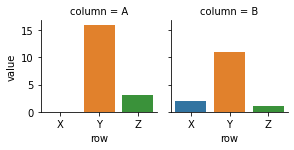

In [ ]:
### Seaborn의 기능 중 한가지 예시입니다.
import seaborn as sns
sns.catplot(x = 'row', y = 'value', col = 'column', kind = 'bar', data = tidy1, height = 2);